In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

In [2]:
weather = pd.read_csv("weatherson.csv")
df=weather.copy()
df.head()

,date,cloudcover,events,max_dew_pointf,max_gust_speedmph,max_humidity,max_sea_level_pressurein,max_temperaturef,max_visibilitymiles,max_wind_speedmph,...,mean_visibilitymiles,mean_wind_speedmph,meandew_pointf,min_dewpointf,min_humidity,min_sea_level_pressurein,min_temperaturef,min_visibilitymiles,precipitationin,winddirdegrees
0,2014-12-01,6,Rain,46,29.0,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
1,2014-12-10,8,Rain,45,29.0,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357
2,2014-12-11,8,Rain-Snow,37,28.0,92,29.81,39,10,21,...,7,13,31,27,82,29.44,32,1,0.02,230
3,2014-12-12,7,Snow,28,21.0,85,29.88,39,10,16,...,10,11,27,25,64,29.81,31,7,0.00,286
4,2014-12-13,5,Snow,28,23.0,75,29.86,42,10,17,...,10,12,26,24,55,29.78,32,10,0.00,298


In [3]:
df.drop("date",axis=1,inplace=True)

In [4]:
df.head()

,cloudcover,events,max_dew_pointf,max_gust_speedmph,max_humidity,max_sea_level_pressurein,max_temperaturef,max_visibilitymiles,max_wind_speedmph,mean_humidity,...,mean_visibilitymiles,mean_wind_speedmph,meandew_pointf,min_dewpointf,min_humidity,min_sea_level_pressurein,min_temperaturef,min_visibilitymiles,precipitationin,winddirdegrees
0,6,Rain,46,29.0,74,30.45,64,10,22,63,...,10,13,40,26,52,30.01,39,10,0.01,268
1,8,Rain,45,29.0,100,29.58,48,10,23,95,...,3,13,39,37,89,29.43,38,1,0.28,357
2,8,Rain-Snow,37,28.0,92,29.81,39,10,21,87,...,7,13,31,27,82,29.44,32,1,0.02,230
3,7,Snow,28,21.0,85,29.88,39,10,16,75,...,10,11,27,25,64,29.81,31,7,0.00,286
4,5,Snow,28,23.0,75,29.86,42,10,17,65,...,10,12,26,24,55,29.78,32,10,0.00,298


In [5]:
df.dtypes

cloudcover                     int64
events                        object
max_dew_pointf                 int64
max_gust_speedmph            float64
max_humidity                   int64
max_sea_level_pressurein     float64
max_temperaturef               int64
max_visibilitymiles            int64
max_wind_speedmph              int64
mean_humidity                  int64
mean_sea_level_pressurein    float64
mean_temperaturef              int64
mean_visibilitymiles           int64
mean_wind_speedmph             int64
meandew_pointf                 int64
min_dewpointf                  int64
min_humidity                   int64
min_sea_level_pressurein     float64
min_temperaturef               int64
min_visibilitymiles            int64
precipitationin              float64
winddirdegrees                 int64
dtype: object

## görselleştirme

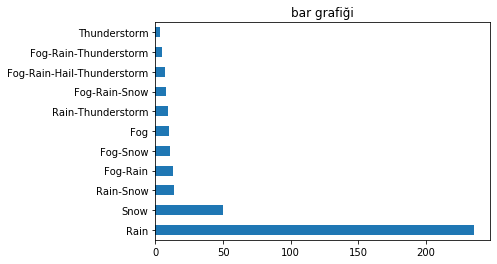

In [6]:
(df["events"].value_counts()
.plot.barh()
.set_title("bar grafiği"));

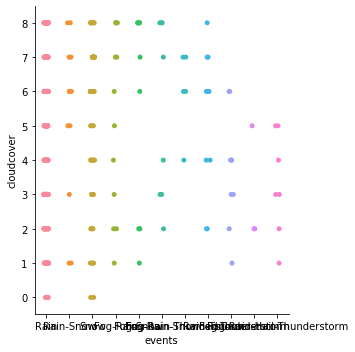

In [7]:
sns.catplot(x="events", y="cloudcover",data=df);

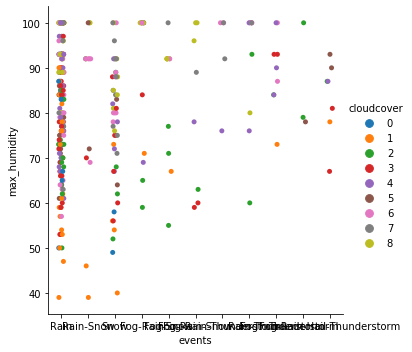

In [8]:
sns.catplot(x="events", y="max_humidity", hue="cloudcover",data=df);

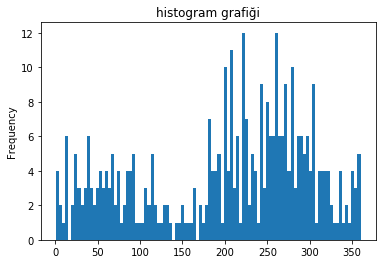

In [9]:
(df["winddirdegrees"]
.plot
.hist(bins=100)
.set_title("histogram grafiği")); 

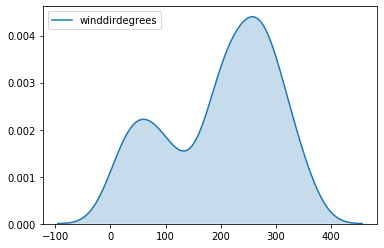

In [10]:
sns.kdeplot(df.winddirdegrees, shade= True); 

In [11]:
cleanup_nums = {"events": {"Rain": 1, "Snow": 2, "Rain-Snow": 3, "Fog-Rain": 4,"Fog-Snow": 5, "Fog": 6, "Rain-Thunderstorm":7,"Fog-Rain-Snow":8 ,
                            "Fog-Rain-Hail-Thunderstorm":9, "Fog-Rain-Thunderstorm":10 , "Thunderstorm":11 }}

In [12]:
df.replace(cleanup_nums, inplace=True)
df.head()

,cloudcover,events,max_dew_pointf,max_gust_speedmph,max_humidity,max_sea_level_pressurein,max_temperaturef,max_visibilitymiles,max_wind_speedmph,mean_humidity,...,mean_visibilitymiles,mean_wind_speedmph,meandew_pointf,min_dewpointf,min_humidity,min_sea_level_pressurein,min_temperaturef,min_visibilitymiles,precipitationin,winddirdegrees
0,6,1,46,29.0,74,30.45,64,10,22,63,...,10,13,40,26,52,30.01,39,10,0.01,268
1,8,1,45,29.0,100,29.58,48,10,23,95,...,3,13,39,37,89,29.43,38,1,0.28,357
2,8,3,37,28.0,92,29.81,39,10,21,87,...,7,13,31,27,82,29.44,32,1,0.02,230
3,7,2,28,21.0,85,29.88,39,10,16,75,...,10,11,27,25,64,29.81,31,7,0.00,286
4,5,2,28,23.0,75,29.86,42,10,17,65,...,10,12,26,24,55,29.78,32,10,0.00,298


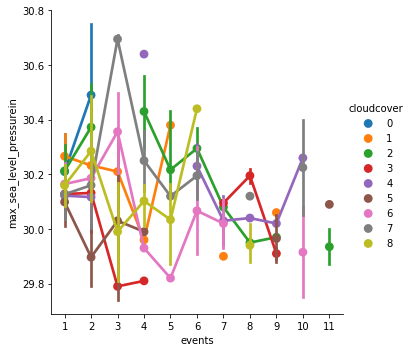

In [13]:
sns.catplot(x="events",y="max_sea_level_pressurein",hue="cloudcover", kind="point", data=df);

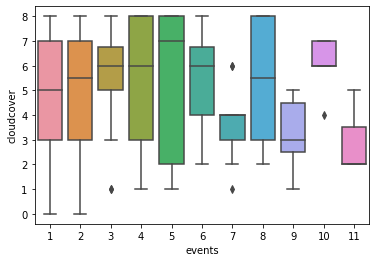

In [14]:
sns.boxplot(x="events",y="cloudcover", data=df);

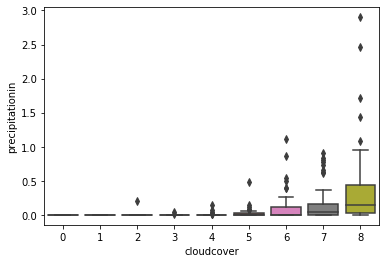

In [15]:
sns.boxplot(x="cloudcover",y="precipitationin", data=df); #bulutluluk vs yağış

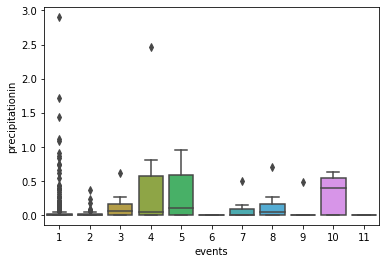

In [16]:
sns.boxplot(x="events",y="precipitationin", data=df);

# machine learning

In [17]:
from sklearn import linear_model
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from warnings import filterwarnings
filterwarnings('ignore')

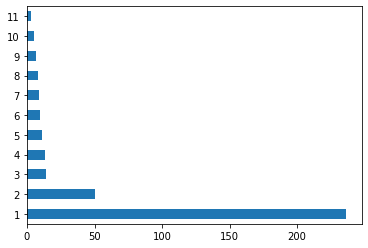

In [18]:
df["events"].value_counts().plot.barh();

In [19]:
y=df["events"]
X= df.drop(["events"], axis=1)

## log reg

In [20]:
loj= LogisticRegression(solver="liblinear")
loj_model=loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
loj_model.intercept_

array([-0.10739205,  0.04299518, -0.02806252,  0.01548495,  0.00501072,
       -0.01331328, -0.021212  ,  0.02828108, -0.00256064, -0.01050364,
       -0.0145311 ])

In [22]:
loj_model.coef_ 

array([[ 0.14076521,  0.06672899, -0.12969927, -0.36513848,  0.48806503,
         0.00692799,  0.05139861,  0.1186752 ,  0.69700361, -0.07029998,
        -0.05443573,  0.08069181,  0.07821807,  0.00572207, -0.05692271,
        -0.32592334, -0.5969931 ,  0.10062701,  0.25607641,  0.32117071,
        -0.00266218],
       [ 0.294237  , -0.20963451,  0.06310448,  0.19549042, -0.4757464 ,
         0.17932784,  0.12490395, -0.07821629, -0.30933198,  0.0254814 ,
        -0.09131443,  0.32990565, -0.22381575, -0.07237681,  0.08879322,
         0.17047188,  0.33621768, -0.09722099, -0.16822179, -0.75175257,
         0.00401827],
       [ 0.1267679 ,  0.04191464,  0.01961629,  0.20094312, -0.27288679,
        -0.37859734,  0.25904869,  0.11395088, -0.40401479, -0.113077  ,
         0.73344773,  0.24134456, -0.0539349 , -0.16717818, -0.10422293,
         0.24229454,  0.0461119 , -0.19071164, -0.24950165, -0.01299721,
        -0.00665876],
       [-0.38862963,  0.19664719, -0.03367687,  0.27937407

In [23]:
y_pred= loj_model.predict(X)

In [24]:
confusion_matrix(y,y_pred)  #gerçekte 1 iken 1 olanlar, gerçekte 0 iken 1 olanlar ...

array([[231,   3,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [ 12,  37,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  6,   4,   4,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 12,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   5,   1,   0,   4,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  4,   2,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [25]:
accuracy_score(y,y_pred)

0.773224043715847

In [26]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.98      0.87       236
           2       0.71      0.74      0.73        50
           3       0.80      0.29      0.42        14
           4       0.00      0.00      0.00        13
           5       0.80      0.36      0.50        11
           6       0.50      0.10      0.17        10
           7       0.50      0.11      0.18         9
           8       1.00      0.25      0.40         8
           9       1.00      0.14      0.25         7
          10       1.00      0.40      0.57         5
          11       0.00      0.00      0.00         3

    accuracy                           0.77       366
   macro avg       0.64      0.31      0.37       366
weighted avg       0.74      0.77      0.72       366



In [27]:
loj_model.predict(X) [0:10] #tahminler

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [29]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
accuracy_score(y_test, loj_model.predict(X_test)) #test hatası

0.7090909090909091

In [31]:
cv_loj_score=cross_val_score(loj_model, X_test, y_test, cv = 10).mean()
cv_loj_score

0.6836580086580086

## knn

In [32]:
knn= KNeighborsClassifier()

In [33]:
knn_model= knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
cv_knn_score=cross_val_score(knn_model, X_test, y_test, cv = 10).mean()
cv_knn_score

0.7023448773448774

## svc

In [35]:
svm_model= SVC(kernel="linear").fit(X_train,y_train)

In [36]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred= svm_model.predict(X_test)

In [38]:
acs_score=accuracy_score(y_test,y_pred)
acs_score

0.7181818181818181

In [39]:
cv_svc_score=cross_val_score(svm_model, X_test, y_test, cv = 10).mean()
cv_svc_score

0.660479797979798

# yapay sinir ağları

In [40]:
from sklearn.preprocessing import StandardScaler  

In [41]:
scaler= StandardScaler() #yapay sinir ağlarında standartlaştırma gerekiyor

In [42]:
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [43]:
X_train_scaled[0:5]

array([[ 0.13456431,  1.4084815 ,  2.76275121,  0.46090247, -1.22012874,
         1.47027202,  0.13648229,  3.09157507,  0.13008117, -0.89608539,
         1.35808264, -0.44057812, -0.46727356,  1.33516405,  1.33438837,
        -0.13674605, -0.70577065,  1.18134589, -1.61899591,  1.59517029,
         0.28515491],
       [ 0.13456431,  1.24784684, -0.31923707,  0.66826808, -0.54647031,
         1.32249438,  0.13648229, -0.43456981,  0.5463409 , -0.16524513,
         1.30629221,  0.57097344, -0.75903462,  1.38535524,  1.47156013,
         0.38401908,  0.1652631 ,  1.28804003,  0.80476405, -0.13008365,
         0.06748177],
       [ 0.13456431,  0.17694912, -1.00412336, -1.33626615,  0.71102542,
         0.38656936,  0.13648229, -0.96349154, -1.3268279 ,  0.90951995,
         0.32227404,  0.57097344, -1.34255672, -0.01999805, -0.0373293 ,
        -1.12041352,  1.11925245,  0.2210986 ,  0.80476405, -0.37081675,
        -0.58553766],
       [-0.71601501, -0.62622418, -0.66168021, -0.92153493

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
mlpc= MLPClassifier().fit(X_train_scaled,y_train)

In [46]:
y_pred = mlpc.predict(X_test_scaled)
acy_score=accuracy_score(y_test, y_pred)
acy_score

0.7

In [47]:
cv_ysa_score=cross_val_score(mlpc, X_test, y_test, cv = 10).mean()
cv_ysa_score

0.6782106782106782

## random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [50]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred = rf_model.predict(X_test)
acr_score=accuracy_score(y_test, y_pred)
acr_score

0.7363636363636363

In [52]:
cv_ran_score=cross_val_score(rf_model, X_test, y_test, cv = 10).mean()
cv_ran_score

0.7323953823953824

## XG boost

In [53]:

from xgboost import XGBClassifier

In [54]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [55]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
y_pred = xgb_model.predict(X_test)
acx_score=accuracy_score(y_test, y_pred)
acx_score

0.7363636363636363

In [57]:
cv_xg_score=cross_val_score(xgb_model, X_test, y_test, cv = 10).mean()
cv_xg_score

0.7654942279942281

## CAT Boost

In [58]:

from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
acc_score=accuracy_score(y_test, y_pred)
acc_score

In [ ]:
cv_cat_score=cross_val_score(cat_model, X_test, y_test, cv = 10).mean()
cv_cat_score

# Light GBM

In [59]:

from lightgbm import LGBMClassifier

In [60]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [61]:
y_pred = lgbm_model.predict(X_test)
acl_score= accuracy_score(y_test, y_pred)
acl_score

0.7545454545454545

In [62]:
cv_light_score=cross_val_score(lgbm_model, X_test, y_test, cv = 10).mean()
cv_light_score

0.7270382395382395

## GaussianNB

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb=GaussianNB()
nb_model=nb.fit (X_train,y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
nb_model.predict(X_test)[0:10]

array([ 4,  2, 10,  6,  3,  9,  3,  8,  6,  1], dtype=int64)

In [66]:
y_pred=nb_model.predict(X_test)

In [67]:
cv_nb_score=cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 
cv_nb_score

0.6446428571428571

In [68]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
p_model=perceptron.fit(X_train, y_train)
p_model

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
perceptron.predict(X_test)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [70]:
y_pred=perceptron.predict(X_test)

In [71]:
cv_p_score=cross_val_score(perceptron, X_test, y_test, cv = 10).mean() 
cv_p_score

0.6523088023088023

## decision tree

In [72]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)  

cv_dc_score=cross_val_score(decision_tree, X_test, y_test, cv = 10).mean() 
cv_dc_score

0.6954545454545455

## modellerin karşılaştırması

In [73]:
results = pd.DataFrame({
    'Model': ['SVC', "YSA", 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', "Light GBM", "GNB", "CAT", "XGB"],
    'Score': [cv_svc_score, cv_ysa_score, cv_knn_score, 
              cv_loj_score, cv_ran_score, cv_dc_score, 
              cv_light_score, cv_nb_score,cv_cat_score,cv_xg_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

NameError: name 'cv_cat_score' is not defined

## değişken önem düzeyi

In [74]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(xgb_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(25)

,importance
feature,
max_temperaturef,0.117
max_dew_pointf,0.117
min_visibilitymiles,0.094
mean_temperaturef,0.078
min_temperaturef,0.066
precipitationin,0.055
max_wind_speedmph,0.044
mean_humidity,0.044
max_sea_level_pressurein,0.040


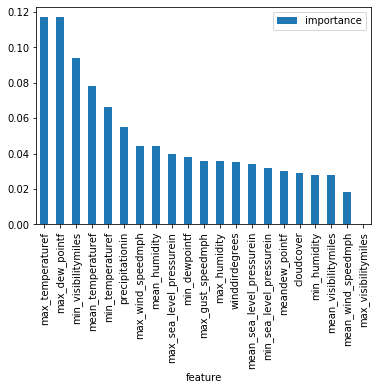

In [75]:
importances.plot.bar();

In [76]:
df  = df.drop("max_visibilitymiles", axis=1)
df  = df.drop("mean_wind_speedmph", axis=1)


## XG boost tekrar

In [77]:

from xgboost import XGBClassifier

In [78]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [79]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
y_pred = xgb_model.predict(X_test)
acx_score=accuracy_score(y_test, y_pred)
acx_score

0.7363636363636363

In [81]:
cv_xg_score=cross_val_score(xgb_model, X_test, y_test, cv = 10).mean()
cv_xg_score

0.7654942279942281

## hiperparametre ayarlama

In [82]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
xgb_params = {'n_estimators': [500, 1000],
        'subsample': [0.6, 1.0],
        'max_depth': [3,6],
        'learning_rate': [0.1,0.01,0.05],
        "min_samples_split": [2,10]}

In [86]:
xgb_model = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb_model, 
                           xgb_params, 
                           cv = 2, 
                           n_jobs = -1, 
                           verbose = 2) 

In [87]:
xgb_cv_model.fit(X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   45.0s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 6], 'min_samples_split': [2, 10],
                         'n_esti

In [88]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [89]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 500,
                    subsample = 0.6)

In [90]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [91]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [92]:
import pickle
from sklearn.externals import joblib

In [114]:
if __name__ == "__main__":
    joblib.dump(xgb_model, 'weather_xgb.pkl') 

In [110]:
loaded_model = joblib.load('weather_xgb.pkl')  

In [111]:
loaded_model = joblib.load("weather_xgb.pkl")
result = loaded_model.score(X_test, y_test)
print(result)

0.7272727272727273


In [123]:
pickle.dump(lgbm_model, open("finalized_model.sav", 'wb'))

In [124]:
loaded_model = pickle.load(open("finalized_model.sav", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7545454545454545
